<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/predictiveModeling/code/linear_regression_cubic_zirconia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone git repository

> add the code below to authenticate the repository



# Import libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Import data

In [24]:
#os.chdir('/content/hogwarts/academia/predictiveModeling/data'); os.getcwd()

In [25]:
rd = pd.read_csv('../data/cubic_zirconia.csv'); rd.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


# Basic EDA

In [26]:
#create a copy of dataframe
df = rd.copy(); df.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499


In [27]:
#drop the unnamed column
df.drop('Unnamed: 0', axis =1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB




1.   The features cut, color & clarity are categorical variables and have object data type which is expected
2.   The rest of the columns are continous & have either float or int data type which again is expected
3. depth seems to have missing values



In [29]:
df_cat = df[['cut','color','clarity']]
df_con = df[['carat','depth','table','x','y','z','price']]

In [30]:
df_con.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [31]:
df_con.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64



1.   The features x, y, & z have minimum value as 0, which is an indicator that these are missing values
2. All the continous columns have skewness score much higher than (+/-)0.05, indicating the data is not normally distributed. This can be further help us deduce the distribution character of the features



Normality test for carat
Statitics = 0.893, p value = 0.000


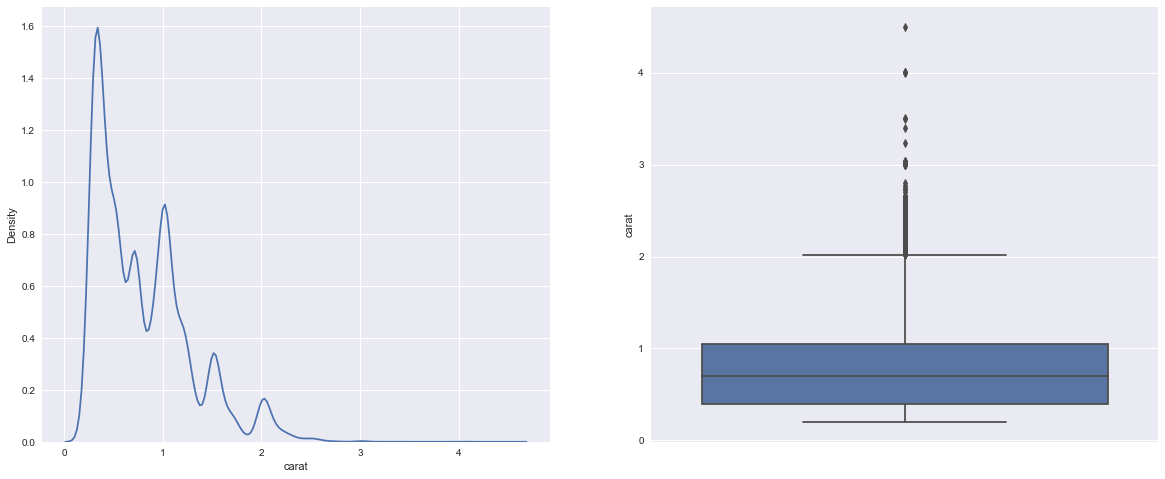

carat is not normally distributed.

Normality test for depth
Statitics = nan, p value = 1.000


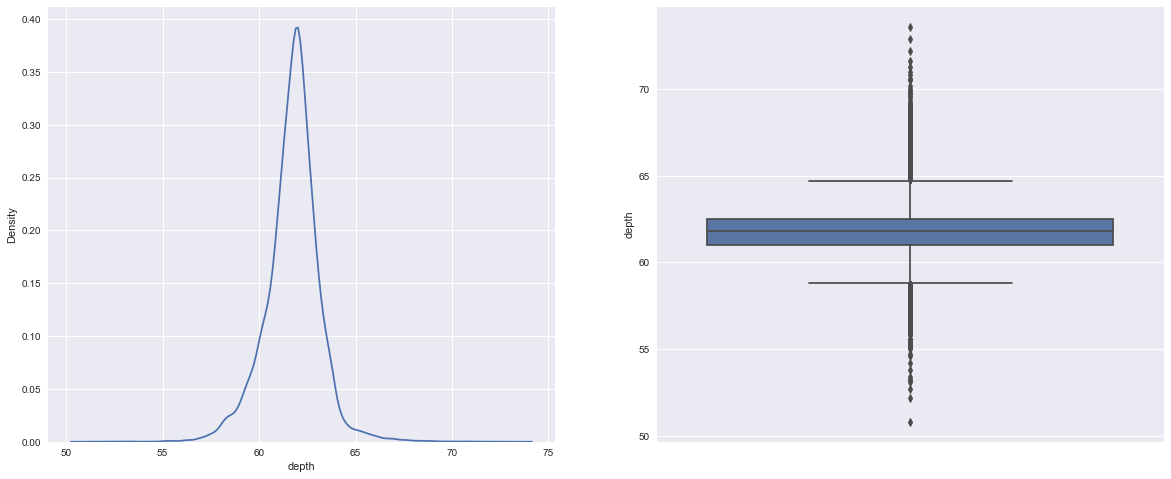

depth is normally distribution and has Gaussian curve.

Normality test for table
Statitics = 0.955, p value = 0.000


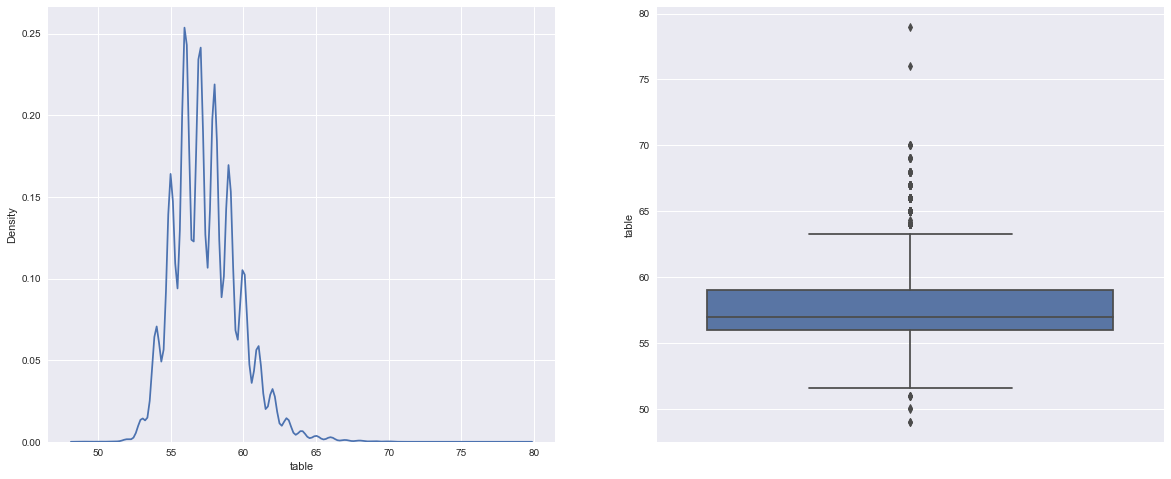

table is not normally distributed.

Normality test for x
Statitics = 0.955, p value = 0.000


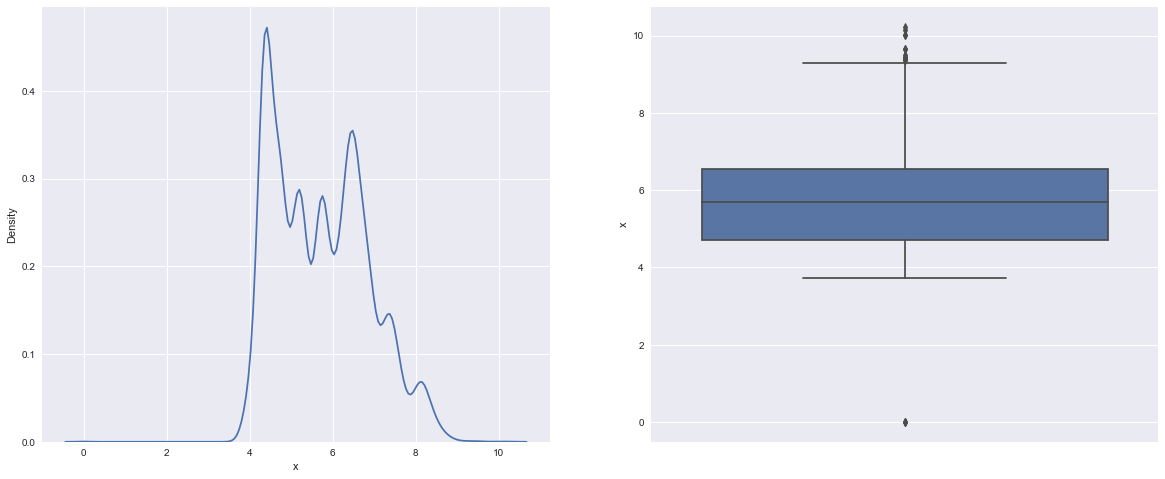

x is not normally distributed.

Normality test for y
Statitics = 0.894, p value = 0.000


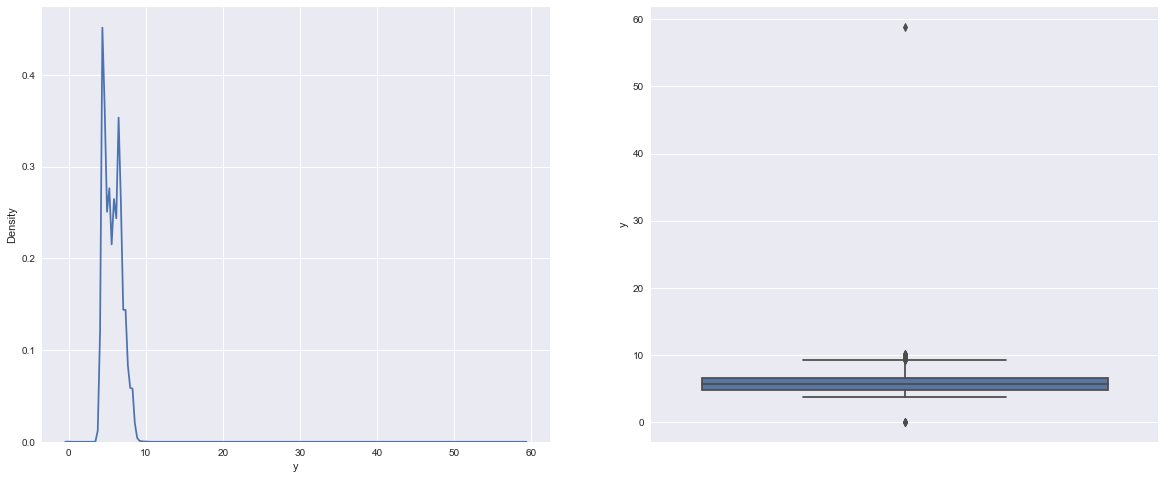

y is not normally distributed.

Normality test for z
Statitics = 0.912, p value = 0.000


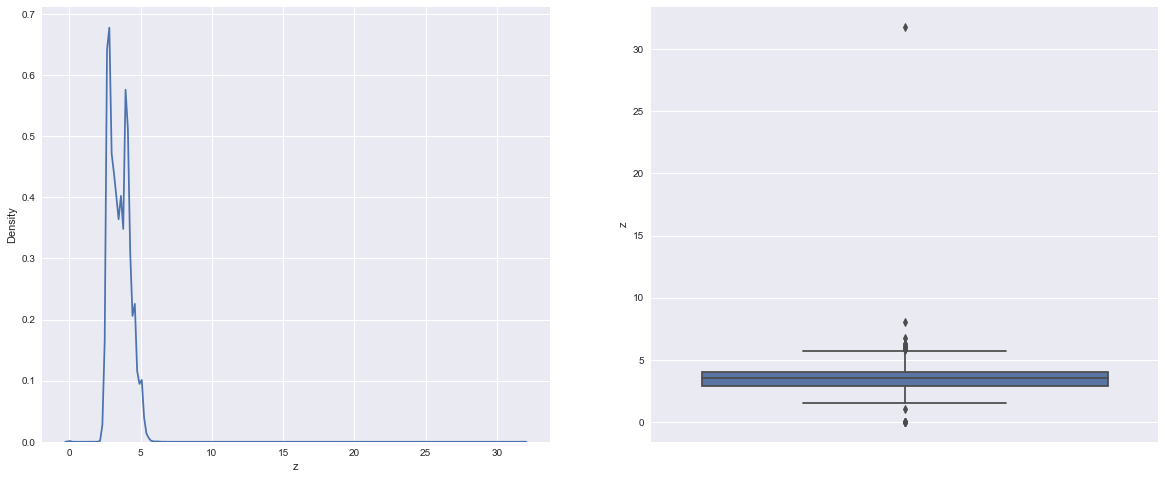

z is not normally distributed.

Normality test for price
Statitics = 0.796, p value = 0.000


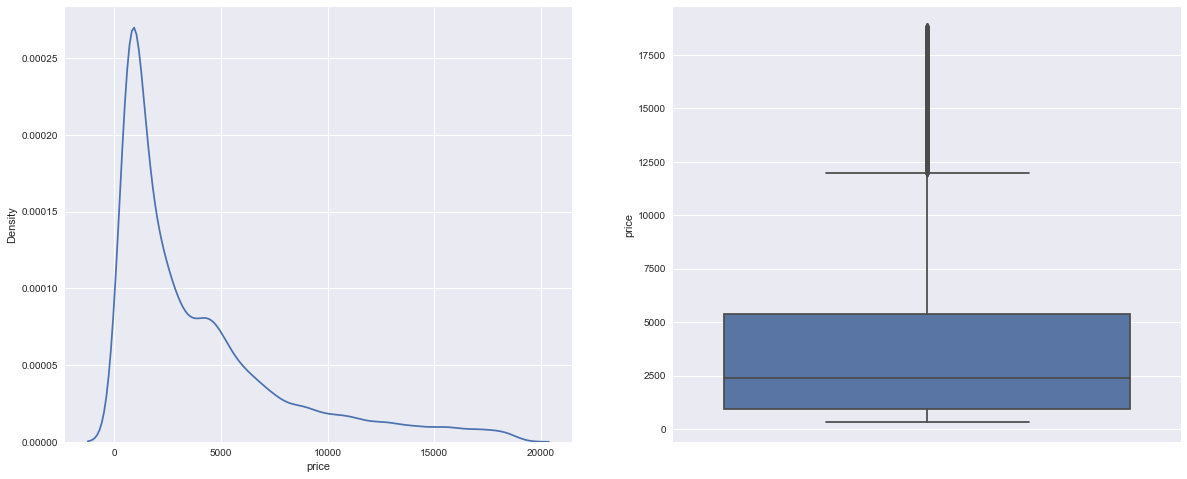

price is not normally distributed.



In [32]:
from scipy.stats import shapiro as shapiro

for feature in df_con.columns:
    stats, p_val = shapiro(rd[feature])
    print('Normality test for', feature)
    print('Statitics = %.3f, p value = %.3f' % (stats, p_val))
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    sns.kdeplot(ax=axes[0], x=df_con[feature])
    sns.boxplot(ax=axes[1], y=df_con[feature])
    plt.show()
    if p_val > 0.05: print(feature, 'is normally distribution and has Gaussian curve.\n')
    else: print(feature, 'is not normally distributed.\n')

The results from Shapiro-Wilk futher solidifies the understanding that features are NOT normally distributed.

<AxesSubplot:ylabel='price'>

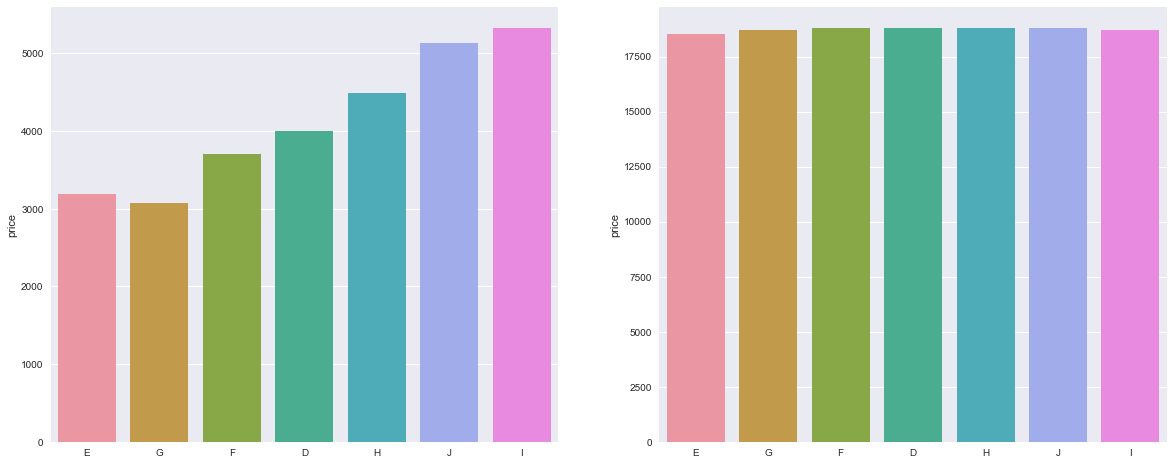

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(ax=axes[0], x=df['color'].unique(), y=df['price'].groupby(df['color']).mean())
sns.barplot(ax=axes[1], x=df['color'].unique(), y=df['price'].groupby(df['color']).max())

<AxesSubplot:ylabel='price'>

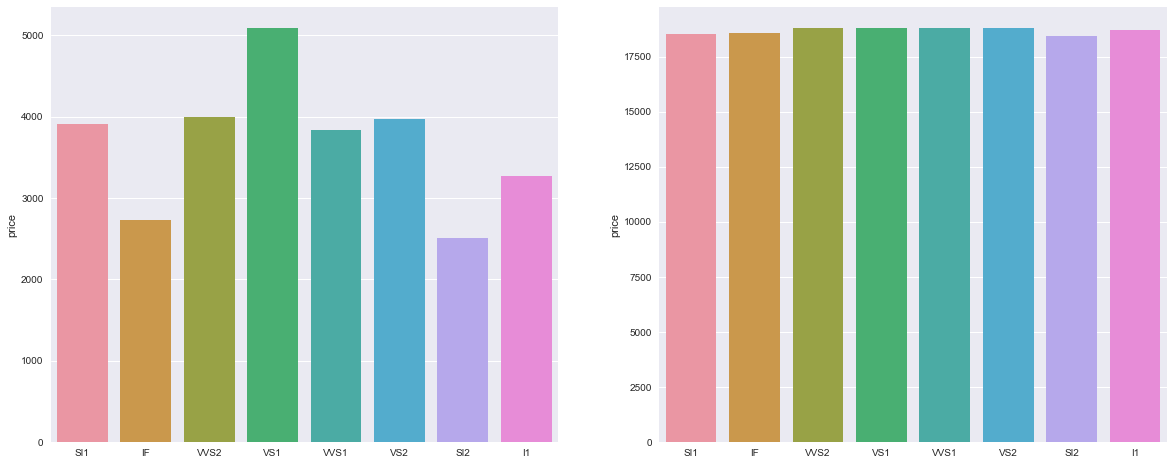

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(ax=axes[0], x=df['clarity'].unique(), y=df['price'].groupby(df['clarity']).mean())
sns.barplot(ax=axes[1], x=df['clarity'].unique(), y=df['price'].groupby(df['clarity']).max())

<AxesSubplot:ylabel='price'>

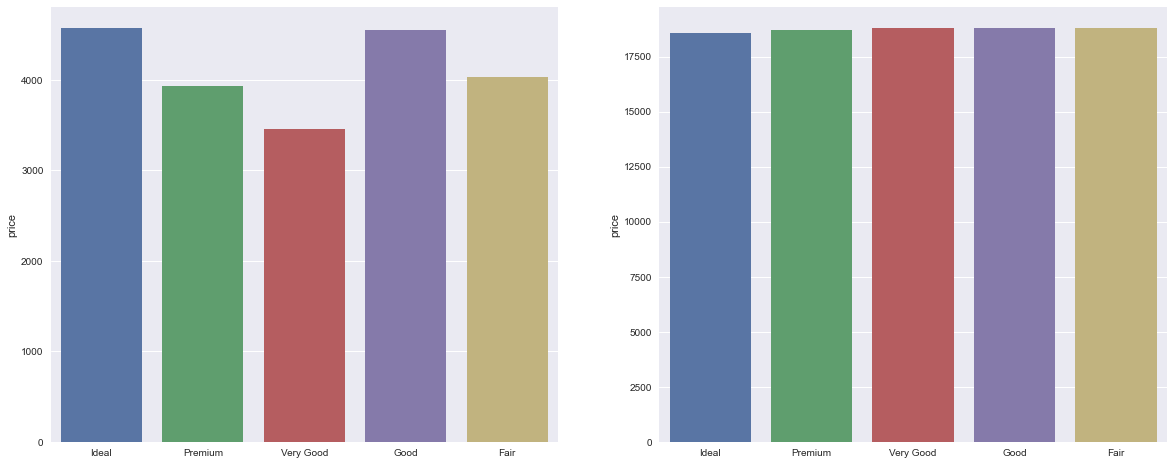

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(ax=axes[0], x=df['cut'].unique(), y=df['price'].groupby(df['cut']).mean())
sns.barplot(ax=axes[1], x=df['cut'].unique(), y=df['price'].groupby(df['cut']).max())

In [36]:
import scipy.stats as stats

crstb_1 = pd.crosstab(df['cut'],df['color'])
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

The observed frequencies are:
 [[  74  100  148  147  150   94   68]
 [ 311  491  454  419  352  253  161]
 [1409 1966 1893 2470 1552 1073  453]
 [ 808 1174 1167 1471 1161  711  407]
 [ 742 1186 1067 1154  887  640  354]] 

The test statistic: 181.60731458430337
The p-value of the test: 3.612478166303676e-26
The degrees of freedom of the test: 24
The expected frequencies, based on the marginal sums of the table:
 [[  97  142  137  164  119   80   42]
 [ 303  445  428  512  371  251  131]
 [1341 1972 1897 2271 1645 1111  579]
 [ 855 1258 1210 1448 1049  709  369]
 [ 748 1099 1057 1266  917  620  323]]
Reject H0: The variables are correlated.


In [37]:
crstb_2 = pd.crosstab(df['clarity'],df['color'])
observed_vals_2 = crstb_2.values
print('The observed frequencies are:\n',observed_vals_2,'\n')
chi2_2, p_2, dof_2, expected_vals_2 = stats.chi2_contingency(observed_vals_2)
print('The test statistic:', chi2_2)
print('The p-value of the test:', p_2)
print('The degrees of freedom of the test:', dof_2)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_2.round(0).astype(int))
if p_2<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

The observed frequencies are:
 [[  25   54   67   68   82   48   21]
 [  38   87  183  342  149   69   26]
 [1040 1249 1088 1001 1082  725  386]
 [ 671  849  753  779  796  469  258]
 [ 369  625  672 1078  595  480  274]
 [ 804 1202 1107 1205  804  603  374]
 [ 121  342  360  507  288  183   38]
 [ 276  509  499  681  306  194   66]] 

The test statistic: 954.1653110821163
The p-value of the test: 1.02315335212344e-172
The degrees of freedom of the test: 42
The expected frequencies, based on the marginal sums of the table:
 [[  45   67   64   77   56   38   20]
 [ 111  163  157  188  136   92   48]
 [ 815 1198 1152 1379 1000  675  352]
 [ 567  834  802  960  696  470  245]
 [ 508  746  718  859  623  421  219]
 [ 756 1112 1070 1280  928  627  326]
 [ 228  335  322  386  280  189   98]
 [ 314  461  444  531  385  260  135]]
Reject H0: The variables are correlated.


In [38]:
crstb_3 = pd.crosstab(df['cut'],df['clarity'])
observed_vals_3 = crstb_3.values
print('The observed frequencies are:\n',observed_vals_3,'\n')
chi2_3, p_3, dof_3, expected_vals_3 = stats.chi2_contingency(observed_vals_3)
print('The test statistic:', chi2_3)
print('The p-value of the test:', p_3)
print('The degrees of freedom of the test:', dof_3)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_3.round(0).astype(int))
if p_3<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

The observed frequencies are:
 [[  89    4  193  225   93  129   10   38]
 [  51   30  765  530  331  491  100  143]
 [  74  613 2150 1324 1784 2528 1036 1307]
 [ 108  115 1809 1449  998 1697  307  416]
 [  43  132 1654 1047  887 1254  386  627]] 

The test statistic: 1967.7566237967862
The p-value of the test: 0.0
The degrees of freedom of the test: 28
The expected frequencies, based on the marginal sums of the table:
 [[  11   26  190  132  119  177   53   73]
 [  33   81  595  414  370  552  166  229]
 [ 146  359 2636 1835 1642 2446  738 1015]
 [  93  229 1681 1170 1047 1560  470  648]
 [  82  200 1469 1023  915 1364  411  566]]
Reject H0: The variables are correlated.


In [39]:
df['depth'].groupby(df['cut']).median()

cut
Fair         65.0
Good         63.3
Ideal        61.8
Premium      61.4
Very Good    62.1
Name: depth, dtype: float64

In [40]:
df_fair = df[(df['cut']=='Fair')]; df_fair['depth'] = df_fair['depth'].fillna(65.0)
df_good = df[(df['cut']=='Good')]; df_good['depth'] = df_good['depth'].fillna(63.3)
df_ideal = df[(df['cut']=='Ideal')]; df_ideal['depth'] = df_ideal['depth'].fillna(61.8)
df_premium = df[(df['cut']=='Premium')]; df_premium['depth'] = df_premium['depth'].fillna(61.4)
df_very_good = df[(df['cut']=='Very Good')]; df_very_good['depth'] = df_very_good['depth'].fillna(62.1)

In [41]:
df_v2 = df_fair.append(df_good); df_v2 = df_v2.append(df_ideal); df_v2 = df_v2.append(df_premium); df_v2 = df_v2.append(df_very_good)

In [42]:
df_v2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [43]:
df_v2['cut'].unique()

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [44]:
df_v2['cut'].replace('Fair',0, inplace=True)
df_v2['cut'].replace('Good',1, inplace=True)
df_v2['cut'].replace('Very Good',2, inplace=True)
df_v2['cut'].replace('Premium',3, inplace=True)
df_v2['cut'].replace('Ideal',4, inplace=True)

In [45]:
df_v2['cut'].astype(int); df_v2['color'].unique()

array(['G', 'J', 'E', 'F', 'D', 'I', 'H'], dtype=object)

In [46]:
 df_v2['color'].unique()

array(['G', 'J', 'E', 'F', 'D', 'I', 'H'], dtype=object)

In [47]:
df_v2['color'].replace('J',0, inplace=True)
df_v2['color'].replace('I',1, inplace=True)
df_v2['color'].replace('H',2, inplace=True)
df_v2['color'].replace('G',3, inplace=True)
df_v2['color'].replace('F',4, inplace=True)
df_v2['color'].replace('E',5, inplace=True)
df_v2['color'].replace('D',6, inplace=True)

In [48]:
df_v2['cut'].astype(int); df_v2['color'].unique()

array([3, 0, 5, 4, 6, 1, 2], dtype=int64)

In [49]:
df_v2['clarity'].unique()

array(['VS2', 'SI1', 'VVS2', 'SI2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [50]:
df_v2['clarity'].replace('I3',0, inplace=True)
df_v2['clarity'].replace('I2',1, inplace=True)
df_v2['clarity'].replace('I1',2, inplace=True)
df_v2['clarity'].replace('SI2',3, inplace=True)
df_v2['clarity'].replace('SI1',4, inplace=True)
df_v2['clarity'].replace('VS2',5, inplace=True)
df_v2['clarity'].replace('VS1',6, inplace=True)
df_v2['clarity'].replace('VVS2',7, inplace=True)
df_v2['clarity'].replace('VVS1',8, inplace=True)
df_v2['clarity'].replace('IF',9, inplace=True)
df_v2['clarity'].replace('FL',10, inplace=True)

In [51]:
df_v2['clarity'].astype(int); df_v2['clarity'].unique()

array([5, 4, 7, 3, 6, 8, 9, 2], dtype=int64)

In [52]:
df_v2_cat = df_v2[['cut','color','clarity']]

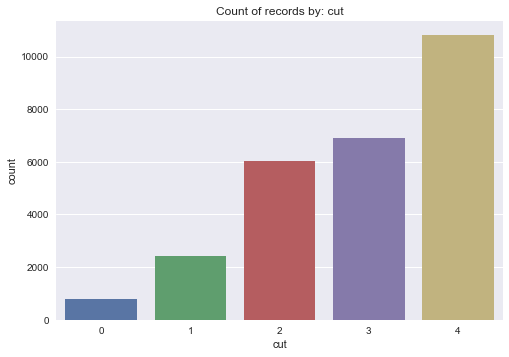

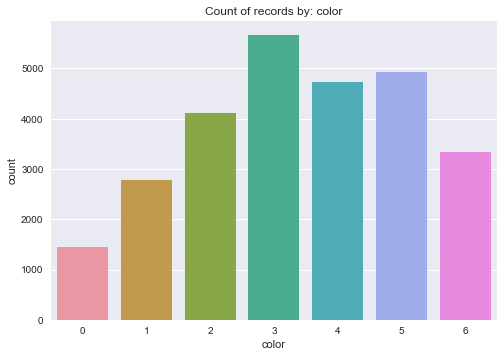

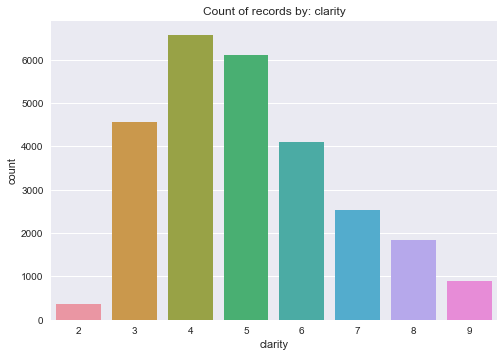

In [53]:
#taking catergorical columns for countplot
for i in df_v2_cat.columns: 
    sns.countplot(df_v2_cat[i]); 
    plt.title('Count of records by: '+i); 
    plt.show()

In [54]:
df_v2_cnt = df_v2[['carat','depth','table','x','y','z','price']]

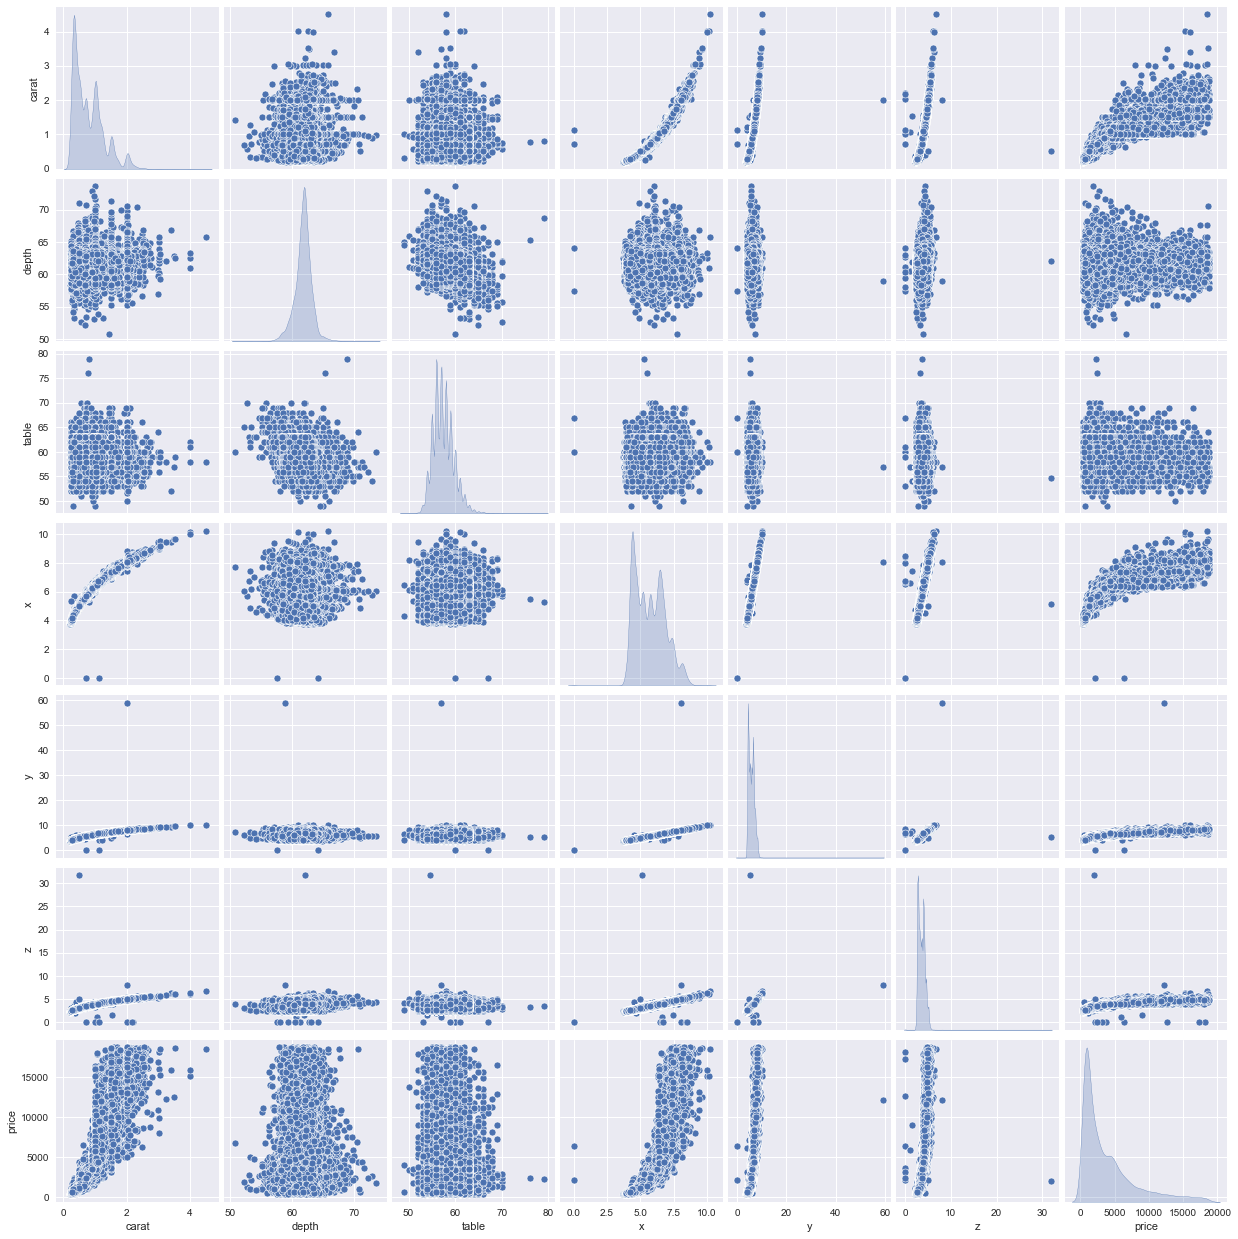

In [55]:
sns.pairplot(data = df_v2_cnt, diag_kind='kde'); plt.show()

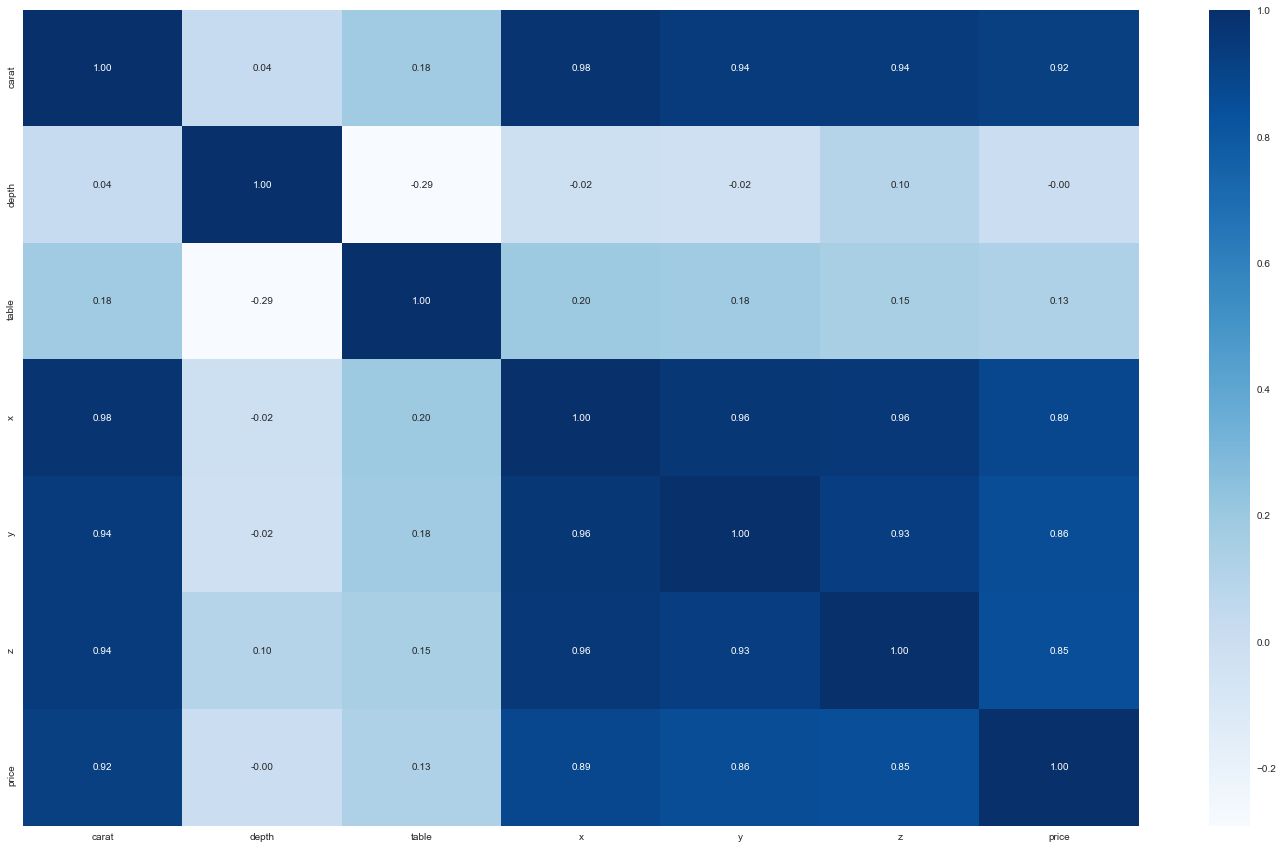

In [56]:
fig = plt.subplots(figsize=(25, 15))

corr = df_v2_cnt.corr(method='pearson')
sns.heatmap(df_v2_cnt.corr(), annot=True,fmt='.2f',cmap='Blues'); plt.show()

In [57]:
df_v2[(df_v2['x']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
17506,1.14,0,3,6,57.5,67.0,0.0,0.0,0.0,6381
5821,0.71,1,4,3,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,1,4,3,64.1,60.0,0.0,0.0,0.0,2130


In [58]:
df_v2[(df_v2['y']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
17506,1.14,0,3,6,57.5,67.0,0.0,0.0,0.0,6381
5821,0.71,1,4,3,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,1,4,3,64.1,60.0,0.0,0.0,0.0,2130


In [59]:
df_v2[(df_v2['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
17506,1.14,0,3,6,57.5,67.0,0.00,0.00,0.0,6381
5821,0.71,1,4,3,64.1,60.0,0.00,0.00,0.0,2130
6215,0.71,1,4,3,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,3,2,5,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,3,2,4,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,3,2,3,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,3,3,3,63.0,59.0,6.50,6.47,0.0,3696
18194,1.01,3,2,2,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,3,3,2,60.4,59.0,6.71,6.67,0.0,2383


In [60]:
print(df_v2['x'].mean()); print(df_v2['x'].median())

5.72985352467831
5.69


In [61]:
df_v2['x'] = df_v2['x'].replace(0,5.69); df_v2[(df_v2['x']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [62]:
print(df_v2['y'].mean()); print(df_v2['y'].median())

5.733568806318835
5.71


In [63]:
df_v2['y'] = df_v2['y'].replace(0,5.69); df_v2[(df_v2['y']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [64]:
print(df_v2['z'].mean()); print(df_v2['z'].median())

3.5380572551637184
3.52


In [65]:
df_v2['z'] = df_v2['z'].replace(0,5.69); df_v2[(df_v2['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [66]:
df_v3 = df_v2.copy()

In [67]:
X = df_v3.drop('price', axis=1, inplace=False)
y = df_v3.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Running a decision tree model to check the importance of variables

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X, y)

DecisionTreeRegressor()

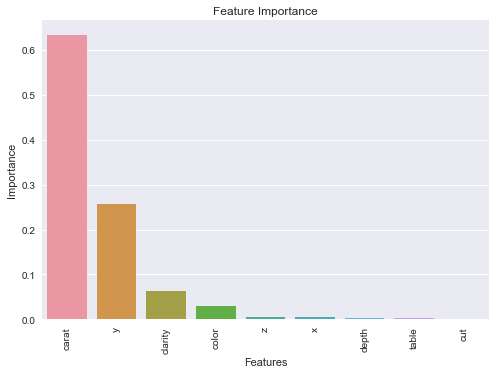

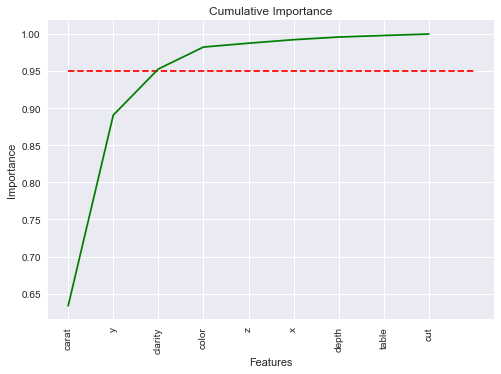

In [69]:
importances = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

### Running a random forest model to check the importance of variables

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

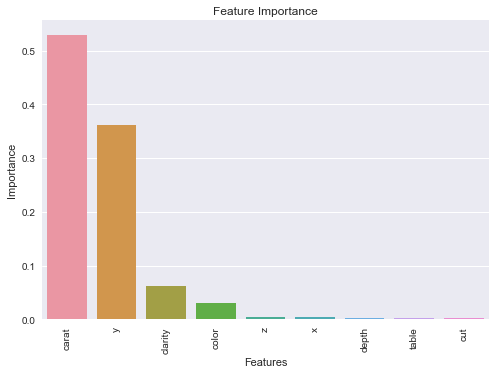

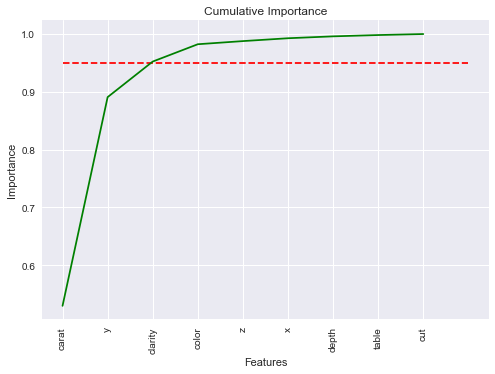

In [71]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

From both the importance plots we can see carat, y, clarity and cut are of highest importance in predicting the price

## Running the linear regression model with all the variables

In [72]:
lrg_model = LinearRegression()
lrg_model.fit(X_train,y_train)
lrg_model

LinearRegression()

In [73]:
lrg_model.intercept_

3205.908426620419

In [74]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lrg_model.coef_[idx]))

The coefficient for carat is 10934.177886789897
The coefficient for cut is 116.27252702413979
The coefficient for color is 323.39834612690566
The coefficient for clarity is 491.35529491889605
The coefficient for depth is -79.84098615591661
The coefficient for table is -28.22134251479718
The coefficient for x is -920.8281954941544
The coefficient for y is 11.888617967720263
The coefficient for z is -46.825439363560044


In [75]:
lrg_model.score(X_train, y_train)

0.9079756907617843

## Running the linear regression model using statsmodel library

In [77]:
import statsmodels.tools as sm
import statsmodels.regression.linear_model as lm

x_train = sm.add_constant(X_train)

lrg_model2 = lm.OLS(y_train, x_train).fit()

In [78]:
lrg_model2.rsquared

0.9079756907617844

In [79]:
lrg_model2.params

const       3205.908427
carat      10934.177887
cut          116.272527
color        323.398346
clarity      491.355295
depth        -79.840986
table        -28.221343
x           -920.828195
y             11.888618
z            -46.825439
dtype: float64

In [80]:
print(lrg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.068e+04
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:22:17   Log-Likelihood:            -1.6075e+05
No. Observations:               18876   AIC:                         3.215e+05
Df Residuals:                   18866   BIC:                         3.216e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3205.9084    710.876      4.510      0.0

## Dropping the x and z columns, as we have seen they are highly correlated to y and testing the performance of model without them

In [81]:
df_v4 = df_v2.copy()

In [82]:
X = df_v4.drop({'price','x','z'}, axis=1, inplace=False)
y = df_v4.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Running the random forest regressor to get the importance of variables in trimmed down version of data set

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

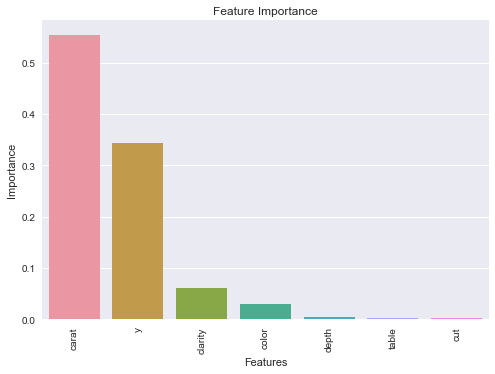

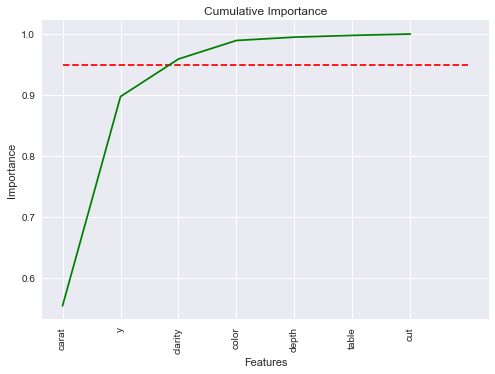

In [84]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

Even with the trimmed down version of dataset, carat, y, clarity and color continue to dominate the importance of price prediction

# Running the linear regression on the trimmed down version(without x, and z) of dataset

In [85]:
lrg_model2 = LinearRegression()
lrg_model2.fit(X_train,y_train)
lrg_model2

LinearRegression()

In [86]:
lrg_model2.intercept_

-1193.8521453508065

In [87]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lrg_model2.coef_[idx]))

The coefficient for carat is 9328.724867293071
The coefficient for cut is 117.7256748074609
The coefficient for color is 320.15037724877106
The coefficient for clarity is 508.9578085511432
The coefficient for depth is -53.27454349621068
The coefficient for table is -29.307012384737963
The coefficient for y is -236.06517047228812


The R-squared score of the model ~90.6%, which is very close to the score we got with all the variables

In [88]:
lrg_model2.score(X_train, y_train)

0.9058210917884361

## Further reducing the variables and keeping carat, y, clarity and color 

In [89]:
df_v5 = df_v2.copy()

In [90]:
X = df_v5.drop({'price','x','z','depth','table','cut'}, axis=1, inplace=False)
y = df_v5.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [91]:
lrg_model3 = LinearRegression()
lrg_model3.fit(X_train,y_train)
lrg_model3

LinearRegression()

In [92]:
lrg_model3.score(X_train, y_train)

0.9037082896054618

The R-squared score after removing x, z, depth, table, and cut and keeping only carat, y, clarity and color is ~90.4% which still very close and comparable to the results we got with original dataset

In [93]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lrg_model3.coef_[idx]))

The coefficient for carat is 9218.995122769351
The coefficient for color is 322.59094946146973
The coefficient for clarity is 529.0318461408227
The coefficient for y is -206.69075255567085


In [94]:
lrg_model3.intercept_

-6015.1809011482555

In [95]:
lrg_model3.score(X_test, y_test)

0.904931184872622

On test data, this model does better than training data and has a R-squared score of ~90.5%

In [96]:
y_train_pred = lrg_model3.predict(X_train)

In [97]:
import sklearn.metrics as metrics

metrics.mean_squared_error(y_train, y_train_pred, squared=False)

1236.491116698828

# Getting stats using statsmodel library

In [98]:
import statsmodels.tools as sm
import statsmodels.regression.linear_model as lm

x_train = sm.add_constant(X_train)

lrg_model3 = lm.OLS(y_train, x_train).fit()

In [99]:
print(lrg_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 4.428e+04
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:22:27   Log-Likelihood:            -1.6118e+05
No. Observations:               18876   AIC:                         3.224e+05
Df Residuals:                   18871   BIC:                         3.224e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6015.1809     95.506    -62.982      0.0

In [100]:
import statsmodels.tools.eval_measures as eval_measures

eval_measures.rmse(y_train, y_train_pred)

1236.491116698828